In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Bootstrap CI


The 95% CI is: [[4.85850539 5.11100989]]


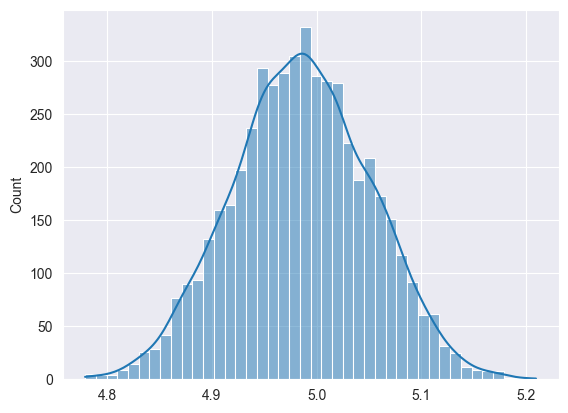

In [9]:
data_sample = np.random.normal(5, 2, 1000)
bootstrap_results = []

for expirement in range(5000):
    bootstrap = np.random.choice(data_sample, size=1000, replace=True)
    statistic_value = np.mean(bootstrap)
    bootstrap_results.append(statistic_value)
    
bootstrap_results = np.array(bootstrap_results)
sns.histplot(bootstrap_results,  kde=True)
print(f"The 95% CI is: [{np.percentile(bootstrap_results, [2.5, 97.5])}]")

## basic bootstrap

In [11]:
data_sample = np.random.normal(5, 2, 1000)
bootstrap_results = []
alpha = 0.05

for expirement in range(5000):
    bootstrap = np.random.choice(data_sample, size=1000, replace=True)
    statistic_value = np.mean(bootstrap)
    bootstrap_results.append(statistic_value)
    
observed_stat = np.mean(bootstrap_results)

L = 2 * observed_stat - np.percentile(bootstrap_results, 100 * (1 - alpha/2))
U = 2 * observed_stat - np.percentile(bootstrap_results, 100 * (alpha/2))

print(f"95% Confidence Interval: ({L}, {U})")


95% Confidence Interval: (4.932824469563672, 5.184631125562125)


## Bias Corrected and Accelerated (BCA) Bootstrap

In [68]:
data_sample = np.random.normal(5, 2, 1000)
alpha = 0.05

def BCA(alpha, data_sample):
    bootstrap_results = []
    orginal_sample_mean = np.mean(data_sample)
    for expirement in range(5000):
        bootstrap = np.random.choice(data_sample, size=1000, replace=True)
        statistic_value = np.mean(bootstrap)
        bootstrap_results.append(statistic_value)
    
    bootstrap_results = np.array(bootstrap_results)
    z_0 = bias_estimation(orginal_sample_mean, bootstrap_results)
    _, alpha_hat = jackknife(data_sample)
    z_alpha = sp.stats.norm.ppf(alpha)
    z_one_minus_alpha = sp.stats.norm.ppf(1 - alpha/2)
    
    alpha_L = sp.stats.norm.cdf(z_0 + ((z_0 + z_alpha) / (1 - alpha_hat * (z_0+z_alpha))))
    alpha_U = sp.stats.norm.cdf(z_0 + ((z_0 + z_one_minus_alpha) / (1 - alpha_hat * (z_0+z_one_minus_alpha))))
    
    CI_upper = np.percentile(bootstrap_results, alpha_U)
    CI_lower = np.percentile(bootstrap_results, alpha_L)
    print(f"[{CI_lower, CI_upper}]")
    
def bias_estimation(orginal_sample_mean, bootstrap_results):
    B = len(bootstrap_results)
    results_smaller_than_orgtheta = len(bootstrap_results[np.where(bootstrap_results < orginal_sample_mean)])
    p_0 = results_smaller_than_orgtheta / B
    z_0 = sp.stats.norm.ppf(p_0) if p_0 > 0 else -np.inf # bias correction
    return z_0
    
    
def jackknife(data_sample):
    n = len(data_sample)
    jackknife_means = []
    theta_hat = np.mean(data_sample)
    
    for i in range(n):
        statistic_without_i = np.mean(np.delete(data_sample, i, axis=0))
        jackknife_means.append(statistic_without_i)
    
    jack_variance = (n - 1) * np.mean((jackknife_means - theta_hat) ** 2)
    # The acceleration is estimated by the skewness of the jackknife estimates
    se_jack = sp.stats.skew(jackknife_means)
    return jack_variance, se_jack



print(BCA(alpha, data_sample))
print(np.mean(data_sample))

[(4.748145300264613, 4.837249820900628)]
None
4.980543156566467
